<a href="https://www.kaggle.com/code/zainawan27/exploratorydataanalysisinsurance?scriptVersionId=244603730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agencyperformance/finalapi.csv


In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/agencyperformance/finalapi.csv')
df.head()


,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
1,3,3,BOILERMACH,CL,IN,2006,0,0,0,151.0,...,0,0,0,103,50,288,0,0,0,0
2,3,3,BOILERMACH,CL,IN,2007,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
3,3,3,BOILERMACH,CL,IN,2008,0,0,0,69.0,...,0,0,0,103,50,288,0,0,0,0
4,3,3,BOILERMACH,CL,IN,2009,0,0,0,28.0,...,0,0,0,103,50,288,0,0,0,0


In [4]:
df.columns

Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED',
       'PL_QUO_CT_APPLIED', 'PL_BOU

# Definitions/Descriptions

These are a lot of abbreviations and terms, so here I operationalize for convenience of the reader (and myself while working on this project).
        
* **AGENCY_ID	Unique:**       ID of the insurance agency
* **PRIMARY_AGENCY_ID:**	    ID of the main or parent agency (if applicable)
* **PROD_ABBR:**	            Product abbreviation (short code for insurance product type)
* **PROD_LINE:**	            Product line (e.g., auto, home, life)
* **STATE_ABBR:**	            U.S. state abbreviation (e.g., NY, CA)
* **STAT_PROFILE_DATE_YEAR:**	Year of the statistical profile or reporting snapshot
* **RETENTION_POLY_QTY:**	    Quantity of retained policies
* **POLY_INFORCE_QTY:**	        Number of in-force (active) policies
* **PREV_POLY_INFORCE_QTY:**	In-force policy count in the previous period
* **NB_WRTN_PREM_AMT:**	        New Business Written Premium Amount
* **WRTN_PREM_AMT:**	        Total Written Premium Amount
* **PREV_WRTN_PREM_AMT:**	    Written Premium Amount from the previous period
* **PRD_ERND_PREM_AMT:**	    Period Earned Premium Amount
* **PRD_INCRD_LOSSES_AMT:**	    Period Incurred Losses Amount
* **MONTHS:**	                Number of months in the time period covered
* **RETENTION_RATIO:**	        Percentage of policies renewed
* **LOSS_RATIO:**	            Incurred losses ÷ earned premium (this is the formula I am aware of)
* **LOSS_RATIO_3YR:**	        3-year average loss ratio
* **GROWTH_RATE_3YR:**	        3-year growth rate 
* **AGENCY_APPOINTMENT_YEAR:**	Year the agency was appointed or contracted
* **ACTIVE_PRODUCERS:**	        Count of active insurance producers (agents)
* **MAX_AGE, MIN_AGE:**	        Maximum and minimum age of something 
* **VENDOR_IND:**	            Vendor indicator 
* **VENDOR:**	                Name or ID of vendor
* **CL_BOUND_CT_MDS:**	        Count of Commercial Lines policies bound via MDS platform
* **CL_QUO_CT_MDS:**	        Count of quotes for CL via MDS
* **CL_BOUND_CT_SBZ:**	        Bound count via SBZ platform 
* **CL_QUO_CT_SBZ:**	        Quotes via SBZ
* **CL_BOUND_CT_eQT:**	        Bound via eQT 
* **CL_QUO_CT_eQT:**	        Quotes via eQT
* **PL_BOUND_CT_ELINKS:**	    Personal Lines bound via eLinks 
* **PL_QUO_CT_ELINKS:**	        Quotes via eLinks
* **PL_BOUND_CT_PLRANK:**	    Bound via PLRank platform or program
* **PL_QUO_CT_PLRANK:**	        Quotes via PLRank
* **PL_BOUND_CT_eQTte:**	    Bound via eQTte
* **PL_QUO_CT_eQTte:**	        Quotes via eQTte
* **PL_BOUND_CT_APPLIED:**	    Bound via Applied (Applied Systems)
* **PL_QUO_CT_APPLIED:**	    Quotes via Applied
* **PL_BOUND_CT_TRANSACTNOW:**	Bound via TransactNow (a quoting/bridging tool)
* **PL_QUO_CT_TRANSACTNOW:**	Quotes via TransactNow

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213328 entries, 0 to 213327
Data columns (total 49 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AGENCY_ID                  213328 non-null  int64  
 1   PRIMARY_AGENCY_ID          213328 non-null  int64  
 2   PROD_ABBR                  213328 non-null  object 
 3   PROD_LINE                  213328 non-null  object 
 4   STATE_ABBR                 213328 non-null  object 
 5   STAT_PROFILE_DATE_YEAR     213328 non-null  int64  
 6   RETENTION_POLY_QTY         213328 non-null  int64  
 7   POLY_INFORCE_QTY           213328 non-null  int64  
 8   PREV_POLY_INFORCE_QTY      213328 non-null  int64  
 9   NB_WRTN_PREM_AMT           213328 non-null  float64
 10  WRTN_PREM_AMT              213328 non-null  float64
 11  PREV_WRTN_PREM_AMT         213328 non-null  float64
 12  PRD_ERND_PREM_AMT          213328 non-null  float64
 13  PRD_INCRD_LOSSES_AMT       21

In [6]:
df.describe()



,AGENCY_ID,PRIMARY_AGENCY_ID,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
count,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,2.133280e+05,2.133280e+05,2.133280e+05,...,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000,213328.000000
mean,4978.964158,21840.982206,2010.191738,158.634525,175.616919,6694.153369,2243.651368,1.963268e+04,2.600812e+04,1.945872e+04,...,26928.162206,26969.472127,26931.800401,27039.756497,26963.478081,27091.403323,26928.081002,26933.596284,26927.300134,26927.453377
std,2928.027642,36410.355440,3.129108,718.766295,774.640860,24639.586044,9976.801667,6.644395e+04,7.008093e+04,6.635115e+04,...,44357.460628,44333.186665,44355.256891,44291.273197,44336.059501,44258.970692,44357.509786,44354.180214,44357.983442,44357.890447
min,3.000000,3.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,-2.027776e+05,-1.861810e+05,-1.643490e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2366.000000,2788.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,2.027500e+00,1.480000e+02,7.600000e+01,...,0.000000,0.000000,0.000000,0.000000,11.000000,66.000000,0.000000,0.000000,0.000000,0.000000
50%,4976.000000,6110.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,1.143620e+03,1.781000e+03,1.180490e+03,...,0.000000,0.000000,0.000000,0.000000,51.000000,258.000000,0.000000,0.000000,0.000000,0.000000
75%,7589.000000,9285.000000,2013.000000,24.000000,30.000000,72.000000,485.000000,8.358695e+03,1.477315e+04,8.231562e+03,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
max,9998.000000,99999.000000,2015.000000,21979.000000,22968.000000,99999.000000,556930.220000,1.715742e+06,1.904570e+06,1.780498e+06,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


In [7]:
df.isnull().sum()

AGENCY_ID                    0
PRIMARY_AGENCY_ID            0
PROD_ABBR                    0
PROD_LINE                    0
STATE_ABBR                   0
STAT_PROFILE_DATE_YEAR       0
RETENTION_POLY_QTY           0
POLY_INFORCE_QTY             0
PREV_POLY_INFORCE_QTY        0
NB_WRTN_PREM_AMT             0
WRTN_PREM_AMT                0
PREV_WRTN_PREM_AMT           0
PRD_ERND_PREM_AMT            0
PRD_INCRD_LOSSES_AMT         0
MONTHS                       0
RETENTION_RATIO              0
LOSS_RATIO                   0
LOSS_RATIO_3YR               0
GROWTH_RATE_3YR              0
AGENCY_APPOINTMENT_YEAR      0
ACTIVE_PRODUCERS             0
MAX_AGE                      0
MIN_AGE                      0
VENDOR_IND                   0
VENDOR                       0
PL_START_YEAR                0
PL_END_YEAR                  0
COMMISIONS_START_YEAR        0
COMMISIONS_END_YEAR          0
CL_START_YEAR                0
CL_END_YEAR                  0
ACTIVITY_NOTES_START_YEAR    0
ACTIVITY

In [8]:
df.nunique()

AGENCY_ID                      1623
PRIMARY_AGENCY_ID               588
PROD_ABBR                        28
PROD_LINE                         2
STATE_ABBR                        6
STAT_PROFILE_DATE_YEAR           11
RETENTION_POLY_QTY             4952
POLY_INFORCE_QTY               5190
PREV_POLY_INFORCE_QTY          5327
NB_WRTN_PREM_AMT              36088
WRTN_PREM_AMT                117534
PREV_WRTN_PREM_AMT           115623
PRD_ERND_PREM_AMT            148184
PRD_INCRD_LOSSES_AMT          49400
MONTHS                           12
RETENTION_RATIO               21377
LOSS_RATIO                    53126
LOSS_RATIO_3YR                14485
GROWTH_RATE_3YR               11050
AGENCY_APPOINTMENT_YEAR          74
ACTIVE_PRODUCERS                 98
MAX_AGE                          61
MIN_AGE                          70
VENDOR_IND                        2
VENDOR                           10
PL_START_YEAR                    23
PL_END_YEAR                      10
COMMISIONS_START_YEAR       

In [9]:
df.sort_values(by = "RETENTION_RATIO", ascending = False).head(10)

,AGENCY_ID,PRIMARY_AGENCY_ID,PROD_ABBR,PROD_LINE,STATE_ABBR,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
0,3,3,BOILERMACH,CL,IN,2005,0,0,0,40.0,...,0,0,0,103,50,288,0,0,0,0
90381,4061,4061,FIREALLIED,CL,OH,2005,0,0,0,4549.0,...,0,0,5,897,52,292,0,0,0,1
90379,4061,4061,CRIME,CL,OH,2014,0,0,0,142.0,...,0,0,5,897,52,292,0,0,0,1
90378,4061,4061,CRIME,CL,OH,2013,0,0,0,0.0,...,0,0,5,897,52,292,0,0,0,1
90377,4061,4061,CRIME,CL,OH,2012,0,0,0,174.0,...,0,0,5,897,52,292,0,0,0,1
90376,4061,4061,CRIME,CL,OH,2011,0,0,0,0.0,...,0,0,5,897,52,292,0,0,0,1
90375,4061,4061,CRIME,CL,OH,2010,0,0,0,649.0,...,0,0,5,897,52,292,0,0,0,1
90374,4061,4061,CRIME,CL,OH,2009,0,0,0,837.0,...,0,0,5,897,52,292,0,0,0,1
90373,4061,4061,CRIME,CL,OH,2008,0,0,0,7345.0,...,0,0,5,897,52,292,0,0,0,1
90372,4061,4061,CRIME,CL,OH,2007,0,0,0,0.0,...,0,0,5,897,52,292,0,0,0,1


In [10]:
df["VENDOR"].unique()

array(['Unknown', 'C', 'A', 'E', 'G', 'B', 'D', 'H', 'J', 'F'],
      dtype=object)

In [11]:
df.corr(numeric_only = True)

,AGENCY_ID,PRIMARY_AGENCY_ID,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
AGENCY_ID,1.000000,0.065296,0.007025,-0.007170,-0.006495,0.008293,0.010933,0.002433,0.004348,0.001985,...,0.024218,0.024116,0.024239,0.024579,0.024208,0.024124,0.024218,0.024205,0.024220,0.024219
PRIMARY_AGENCY_ID,0.065296,1.000000,-0.122077,-0.066153,-0.067195,-0.009848,-0.058593,-0.091112,-0.081460,-0.089261,...,0.571235,0.571180,0.571246,0.571306,0.571193,0.571008,0.571234,0.571219,0.571235,0.571235
STAT_PROFILE_DATE_YEAR,0.007025,-0.122077,1.000000,-0.043028,-0.046535,-0.026766,-0.021697,-0.025600,-0.035244,-0.027362,...,-0.065431,-0.065422,-0.065427,-0.065364,-0.065442,-0.065441,-0.065430,-0.065428,-0.065431,-0.065431
RETENTION_POLY_QTY,-0.007170,-0.066153,-0.043028,1.000000,0.996391,-0.025301,0.336233,0.812768,0.770823,0.819851,...,-0.091004,-0.090939,-0.091007,-0.091117,-0.090859,-0.090484,-0.091004,-0.090988,-0.091007,-0.091007
POLY_INFORCE_QTY,-0.006495,-0.067195,-0.046535,0.996391,1.000000,-0.022790,0.363053,0.808403,0.761774,0.813629,...,-0.092724,-0.092661,-0.092724,-0.092812,-0.092572,-0.092178,-0.092723,-0.092707,-0.092726,-0.092727
PREV_POLY_INFORCE_QTY,0.008293,-0.009848,-0.026766,-0.025301,-0.022790,1.000000,0.057718,-0.034032,0.304151,-0.041659,...,0.045470,0.045492,0.045472,0.045581,0.045445,0.045415,0.045470,0.045471,0.045469,0.045470
NB_WRTN_PREM_AMT,0.010933,-0.058593,-0.021697,0.336233,0.363053,0.057718,1.000000,0.565314,0.466843,0.520291,...,-0.051411,-0.051352,-0.051393,-0.051078,-0.051309,-0.051006,-0.051412,-0.051404,-0.051414,-0.051414
WRTN_PREM_AMT,0.002433,-0.091112,-0.025600,0.812768,0.808403,-0.034032,0.565314,1.000000,0.922929,0.995340,...,-0.103578,-0.103442,-0.103570,-0.103403,-0.103454,-0.103085,-0.103579,-0.103562,-0.103583,-0.103583
PREV_WRTN_PREM_AMT,0.004348,-0.081460,-0.035244,0.770823,0.761774,0.304151,0.466843,0.922929,1.000000,0.928938,...,-0.078822,-0.078690,-0.078815,-0.078644,-0.078719,-0.078399,-0.078824,-0.078807,-0.078827,-0.078827
PRD_ERND_PREM_AMT,0.001985,-0.089261,-0.027362,0.819851,0.813629,-0.041659,0.520291,0.995340,0.928938,1.000000,...,-0.103107,-0.102971,-0.103100,-0.102945,-0.102985,-0.102625,-0.103108,-0.103091,-0.103112,-0.103112


# Agency Performance

**Objectives:**
1. Rank agencies based on key metrics
2. Compare retention ratios and loss ratios


Insight sought after:
To understand which agencies are valuable, which are risky, and which might need support or intervention.

# 1. Rank Agencies based on key metrics
(Total written premium and Number of policies in force) 

In [12]:
agency_rank_df = df [['AGENCY_ID','RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT']]

In [13]:
agency_rank_df.head()

,AGENCY_ID,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,3,0,0,0,40.0,3074.63,149.00,3005.77,0.0
1,3,0,0,0,151.0,6562.28,5438.55,6433.44,0.0
2,3,0,0,0,40.0,6205.11,6562.28,6357.09,0.0
3,3,0,0,0,69.0,5159.89,6205.11,5315.01,0.0
4,3,0,0,0,28.0,4527.71,5159.89,4706.47,0.0


In [14]:
grouped_agency_rank_df = agency_rank_df.groupby('AGENCY_ID').sum().reset_index()

In [15]:
grouped_agency_rank_df.head()

,AGENCY_ID,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,3,116292,124056,1528028,665927.13,15971825.30,17952288.75,16249834.85,8746018.85
1,11,574,638,200869,4471.08,81859.86,320588.40,91800.82,31614.88
2,12,9844,13051,713044,211427.04,880554.17,1580547.17,829854.40,675481.76
3,14,0,0,199998,0.00,0.00,199998.00,0.00,0.00
4,16,18239,21988,921620,394849.22,2210858.42,3010985.25,2194566.49,930316.79


In [16]:
grouped_agency_rank_df.sort_values(by = "WRTN_PREM_AMT", ascending = False,ignore_index = True).reset_index()

,index,AGENCY_ID,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,0,5468,177944,201843,2504070,3436812.04,46079054.07,47180713.53,45758573.78,26977803.59
1,1,9733,329512,355185,2768332,2774908.48,33777988.77,36789048.44,33824063.53,22123554.75
2,2,1786,216703,246375,1144173,3605977.92,32761878.06,33260297.37,32406632.95,15189582.96
3,3,886,281005,307224,1508157,2402297.46,31047109.86,31830211.08,30708548.42,16774355.19
4,4,8365,133257,153846,3550203,2986263.89,29442920.69,31205372.52,28606289.71,16908980.49
...,...,...,...,...,...,...,...,...,...,...
1618,1618,111,0,0,300612,0.00,-3602.67,357282.00,5599.53,137890.61
1619,1619,1054,202,207,200890,331.07,-5512.16,278536.20,-653.62,-6305.56
1620,1620,7259,52,53,939,0.00,-6862.38,92361.18,-2205.79,14124.87
1621,1621,1400,0,0,4163,497.66,-23322.58,287223.91,20192.92,-4306.77


The goal here is to look at the best performing agencies in terms of premiums. The table contains 5 columns where this matters and the following blocks of code are each to produce relevant barplots for each.

In [17]:
sorted_grouped_agency_rank_df = grouped_agency_rank_df.sort_values(by = "WRTN_PREM_AMT", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)

In [18]:
sorted_grouped_agency_rank_df.AGENCY_ID = sorted_grouped_agency_rank_df.AGENCY_ID.astype(str)
sorted_grouped_agency_rank_df

,AGENCY_ID,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,5468,177944,201843,2504070,3436812.04,46079054.07,47180713.53,45758573.78,26977803.59
1,9733,329512,355185,2768332,2774908.48,33777988.77,36789048.44,33824063.53,22123554.75
2,1786,216703,246375,1144173,3605977.92,32761878.06,33260297.37,32406632.95,15189582.96
3,886,281005,307224,1508157,2402297.46,31047109.86,31830211.08,30708548.42,16774355.19
4,8365,133257,153846,3550203,2986263.89,29442920.69,31205372.52,28606289.71,16908980.49
...,...,...,...,...,...,...,...,...,...
1618,111,0,0,300612,0.00,-3602.67,357282.00,5599.53,137890.61
1619,1054,202,207,200890,331.07,-5512.16,278536.20,-653.62,-6305.56
1620,7259,52,53,939,0.00,-6862.38,92361.18,-2205.79,14124.87
1621,1400,0,0,4163,497.66,-23322.58,287223.91,20192.92,-4306.77


[Text(0.5, 0, 'Agency ID'), Text(0, 0.5, 'Written Premium Amount')]

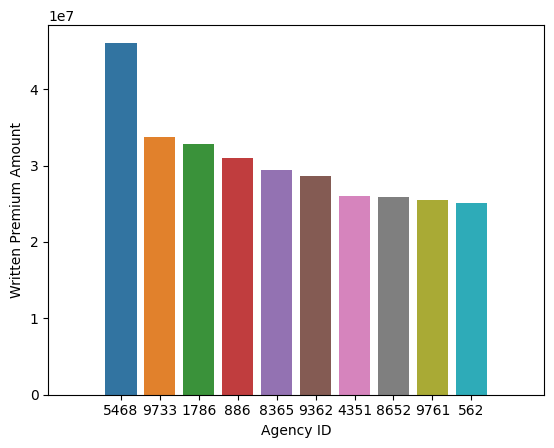

In [19]:
ax_1 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'WRTN_PREM_AMT', fill = "True"
)
ax_1.margins(x=0.15)
ax_1.set(xlabel='Agency ID', ylabel='Written Premium Amount')

[Text(0.5, 0, 'Agency ID'),
 Text(0, 0.5, 'New Business Written Premium Amount')]

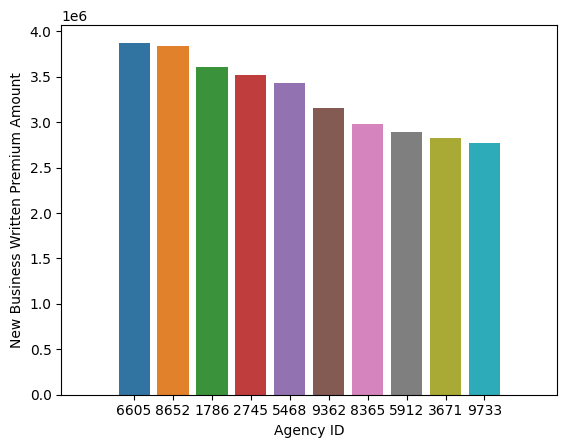

In [20]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "NB_WRTN_PREM_AMT", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)

ax_2 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'NB_WRTN_PREM_AMT', fill = "True"
)
ax_2.margins(x=0.15)
ax_2.set(xlabel='Agency ID', ylabel='New Business Written Premium Amount')

[Text(0.5, 0, 'Agency ID'),
 Text(0, 0.5, 'Written Premium Amount (Previous Period)')]

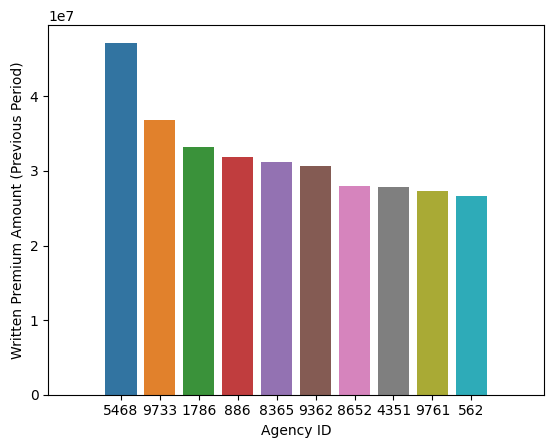

In [21]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "PREV_WRTN_PREM_AMT", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ax_3 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'PREV_WRTN_PREM_AMT', fill = "True"
)
ax_3.margins(x=0.15)
ax_3.set(xlabel='Agency ID', ylabel='Written Premium Amount (Previous Period)')

[Text(0.5, 0, 'Agency ID'), Text(0, 0.5, 'Period Earned Premium Amount')]

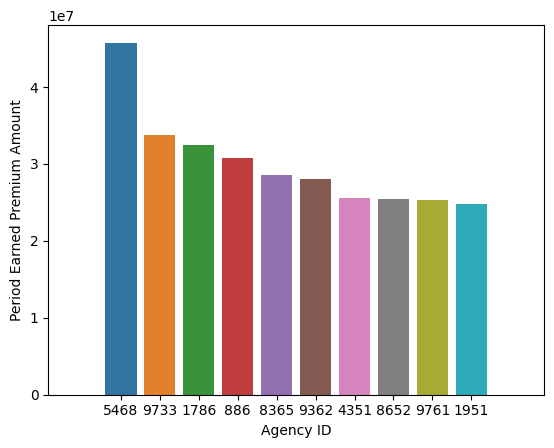

In [22]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "PRD_ERND_PREM_AMT", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ax_4 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'PRD_ERND_PREM_AMT', fill = "True"
)
ax_4.margins(x=0.15)
ax_4.set(xlabel='Agency ID', ylabel='Period Earned Premium Amount')

[Text(0.5, 0, 'Agency ID'), Text(0, 0.5, 'Period Incurred Losses Amount')]

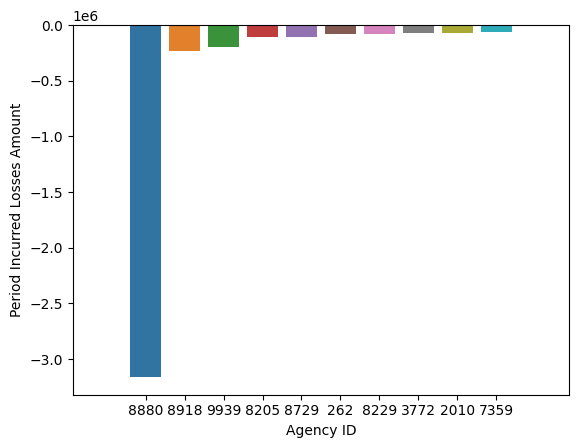

In [23]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "PRD_INCRD_LOSSES_AMT", ascending = True).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ax_5 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'PRD_INCRD_LOSSES_AMT', fill = "True"
)
ax_5.margins(x=0.15)
ax_5.set(xlabel='Agency ID', ylabel='Period Incurred Losses Amount')
# Note: This column pertains to losses, hence the best performing agencies should be the ones with the lowest losses incurred according to this column.

In [24]:
sorted_grouped_agency_rank_df

,AGENCY_ID,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,8880,5480,6892,606373,892909.78,4119169.39,4566412.75,4016119.54,-3162401.49
1,8918,0,0,0,0.00,0.00,0.00,0.00,-229305.73
2,9939,0,0,0,0.00,0.00,0.00,0.00,-195407.39
3,8205,0,0,0,0.00,0.00,0.00,0.00,-109743.78
4,8729,0,0,0,0.00,0.00,0.00,0.00,-105031.78
...,...,...,...,...,...,...,...,...,...
1618,9969,40019,50181,1850137,2441739.67,21851508.24,24289893.73,22262551.31,17421260.44
1619,2379,32849,39344,8539219,69852.58,3005953.33,11467545.66,3119256.01,18919308.85
1620,9362,137489,156948,3159289,3156956.82,28675251.18,30616049.85,28059479.33,20633911.61
1621,9733,329512,355185,2768332,2774908.48,33777988.77,36789048.44,33824063.53,22123554.75


# Task Conclusion for Premium-related Data

With this, we can see the top 10 agencies in terms of different measures relevant to premiums. 

Following a similar approach, we now apply a similar idea to gain insighs on policy inforced and related columns.

[Text(0.5, 0, 'Agency ID'), Text(0, 0.5, 'Polycies Inforce Quntity')]

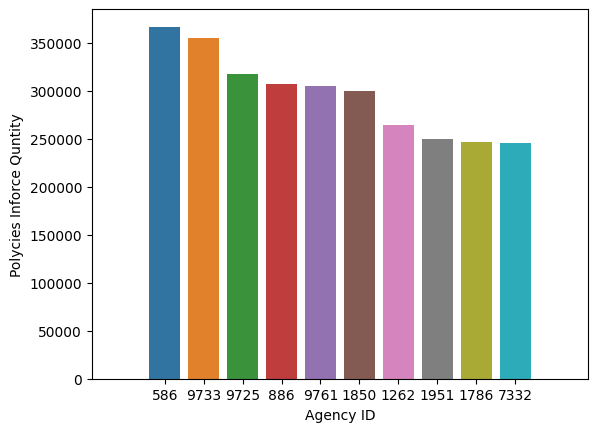

In [25]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "POLY_INFORCE_QTY", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ay_1 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'POLY_INFORCE_QTY', fill = "True"
)
ay_1.margins(x=0.15)
ay_1.set(xlabel='Agency ID', ylabel='Polycies Inforce Quntity')

[Text(0.5, 0, 'Agency ID'), Text(0, 0.5, 'Quantity of retained policies')]

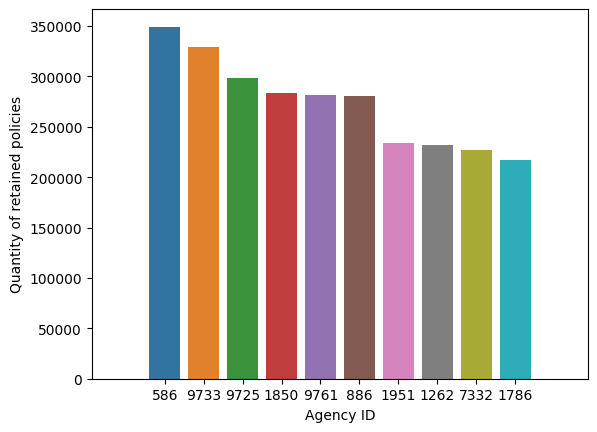

In [26]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "RETENTION_POLY_QTY", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ay_2 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'RETENTION_POLY_QTY', fill = "True"
)
ay_2.margins(x=0.15)
ay_2.set(xlabel='Agency ID', ylabel='Quantity of retained policies')

[Text(0.5, 0, 'Agency ID'),
 Text(0, 0.5, 'Quantity of Inforced Policy (Previous Period)')]

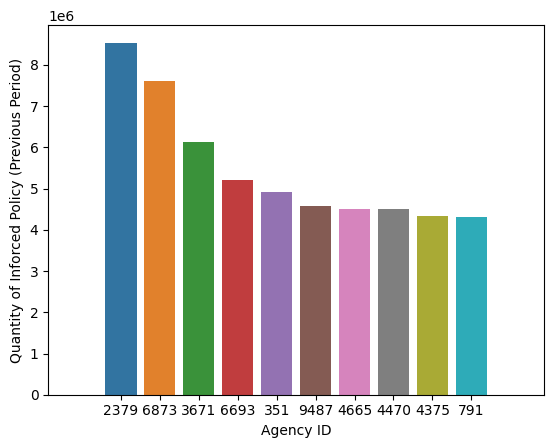

In [27]:
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.sort_values(by = "PREV_POLY_INFORCE_QTY", ascending = False).reset_index()
sorted_grouped_agency_rank_df = sorted_grouped_agency_rank_df.drop("index",axis = 1)


ay_3 = sns.barplot(
    data = sorted_grouped_agency_rank_df.head(10), x = 'AGENCY_ID',
    y = 'PREV_POLY_INFORCE_QTY', fill = "True"
)
ay_3.margins(x=0.15)
ay_3.set(xlabel='Agency ID', ylabel='Quantity of Inforced Policy (Previous Period)')

# Data Over Given Period

we look at the data set from the perspective of data over the given period

In [28]:
df.columns

Index(['AGENCY_ID', 'PRIMARY_AGENCY_ID', 'PROD_ABBR', 'PROD_LINE',
       'STATE_ABBR', 'STAT_PROFILE_DATE_YEAR', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT', 'MONTHS', 'RETENTION_RATIO', 'LOSS_RATIO',
       'LOSS_RATIO_3YR', 'GROWTH_RATE_3YR', 'AGENCY_APPOINTMENT_YEAR',
       'ACTIVE_PRODUCERS', 'MAX_AGE', 'MIN_AGE', 'VENDOR_IND', 'VENDOR',
       'PL_START_YEAR', 'PL_END_YEAR', 'COMMISIONS_START_YEAR',
       'COMMISIONS_END_YEAR', 'CL_START_YEAR', 'CL_END_YEAR',
       'ACTIVITY_NOTES_START_YEAR', 'ACTIVITY_NOTES_END_YEAR',
       'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS', 'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ',
       'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT', 'PL_BOUND_CT_ELINKS',
       'PL_QUO_CT_ELINKS', 'PL_BOUND_CT_PLRANK', 'PL_QUO_CT_PLRANK',
       'PL_BOUND_CT_eQTte', 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED',
       'PL_QUO_CT_APPLIED', 'PL_BOU

In [29]:
wrt_df = df [['AGENCY_ID','MONTHS', 'RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT']]

In [30]:
wrt_df.head()

,AGENCY_ID,MONTHS,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,3,8,0,0,0,40.0,3074.63,149.00,3005.77,0.0
1,3,12,0,0,0,151.0,6562.28,5438.55,6433.44,0.0
2,3,12,0,0,0,40.0,6205.11,6562.28,6357.09,0.0
3,3,12,0,0,0,69.0,5159.89,6205.11,5315.01,0.0
4,3,12,0,0,0,28.0,4527.71,5159.89,4706.47,0.0


In [31]:
grouped_wrt_df = wrt_df.groupby('AGENCY_ID').sum().reset_index()

In [32]:
grouped_wrt_df.head()

,AGENCY_ID,MONTHS,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,3,5453,116292,124056,1528028,665927.13,15971825.30,17952288.75,16249834.85,8746018.85
1,11,1000,574,638,200869,4471.08,81859.86,320588.40,91800.82,31614.88
2,12,461,9844,13051,713044,211427.04,880554.17,1580547.17,829854.40,675481.76
3,14,43,0,0,199998,0.00,0.00,199998.00,0.00,0.00
4,16,2831,18239,21988,921620,394849.22,2210858.42,3010985.25,2194566.49,930316.79


With this we can compare by averaging relative to month count. Agencies operating for a longer period of time would benefit more from a straight comparison of metrics, allowing for possible inaccuracies.


In [33]:
# Making sure that the months row is non-zero

grouped_wrt_df.loc[grouped_wrt_df['MONTHS'] != 0].shape

(1623, 10)

In [34]:
grouped_wrt_df.shape

(1623, 10)

In [35]:
grouped_wrt_df["MONTH_RETENTION_POLY_QTY"] = grouped_wrt_df["RETENTION_POLY_QTY"].divide(grouped_wrt_df["MONTHS"])

In [36]:
grouped_wrt_df.head()

,AGENCY_ID,MONTHS,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT,MONTH_RETENTION_POLY_QTY
0,3,5453,116292,124056,1528028,665927.13,15971825.30,17952288.75,16249834.85,8746018.85,21.326242
1,11,1000,574,638,200869,4471.08,81859.86,320588.40,91800.82,31614.88,0.574000
2,12,461,9844,13051,713044,211427.04,880554.17,1580547.17,829854.40,675481.76,21.353579
3,14,43,0,0,199998,0.00,0.00,199998.00,0.00,0.00,0.000000
4,16,2831,18239,21988,921620,394849.22,2210858.42,3010985.25,2194566.49,930316.79,6.442600


In [37]:
grouped_wrt_df["MONTH_POLY_INFORCE_QTY"] = grouped_wrt_df["POLY_INFORCE_QTY"].divide(grouped_wrt_df["MONTHS"])
grouped_wrt_df["MONTH_NB_WRTN_PREM_AMT"] = grouped_wrt_df["NB_WRTN_PREM_AMT"].divide(grouped_wrt_df["MONTHS"])
grouped_wrt_df["MONTH_WRTN_PREM_AMT"] = grouped_wrt_df["WRTN_PREM_AMT"].divide(grouped_wrt_df["MONTHS"])
grouped_wrt_df["MONTH_PRD_ERND_PREM_AMT"] = grouped_wrt_df["PRD_ERND_PREM_AMT"].divide(grouped_wrt_df["MONTHS"])
grouped_wrt_df["MONTH_PRD_INCRD_LOSSES_AMT"] = grouped_wrt_df["PRD_INCRD_LOSSES_AMT"].divide(grouped_wrt_df["MONTHS"])


In [38]:
grouped_wrt_df = grouped_wrt_df.drop(['RETENTION_POLY_QTY',
       'POLY_INFORCE_QTY', 'PREV_POLY_INFORCE_QTY', 'NB_WRTN_PREM_AMT',
       'WRTN_PREM_AMT', 'PREV_WRTN_PREM_AMT', 'PRD_ERND_PREM_AMT',
       'PRD_INCRD_LOSSES_AMT'], axis =1
        )

In [39]:
grouped_wrt_df.AGENCY_ID = grouped_wrt_df.AGENCY_ID.astype(str)
grouped_wrt_df

,AGENCY_ID,MONTHS,MONTH_RETENTION_POLY_QTY,MONTH_POLY_INFORCE_QTY,MONTH_NB_WRTN_PREM_AMT,MONTH_WRTN_PREM_AMT,MONTH_PRD_ERND_PREM_AMT,MONTH_PRD_INCRD_LOSSES_AMT
0,3,5453,21.326242,22.750046,122.121242,2928.997854,2979.980717,1603.891225
1,11,1000,0.574000,0.638000,4.471080,81.859860,91.800820,31.614880
2,12,461,21.353579,28.310195,458.626985,1910.095813,1800.118004,1465.253275
3,14,43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,16,2831,6.442600,7.766867,139.473409,780.946104,775.191272,328.617729
...,...,...,...,...,...,...,...,...
1618,9962,82,0.000000,0.000000,0.000000,0.000000,0.000000,240.556585
1619,9966,1579,1.907536,2.136795,32.237834,207.386200,230.197897,106.846669
1620,9969,4609,8.682795,10.887611,529.776453,4741.051907,4830.234608,3779.835201
1621,9975,152,0.000000,0.000000,0.000000,0.000000,0.000000,-5.927763


In [40]:
sorted_grouped_wrt_df = grouped_wrt_df.sort_values(by = "MONTH_RETENTION_POLY_QTY", ascending = False).reset_index()
sorted_grouped_wrt_df = sorted_grouped_wrt_df.drop("index",axis = 1)

sorted_grouped_wrt_df

,AGENCY_ID,MONTHS,MONTH_RETENTION_POLY_QTY,MONTH_POLY_INFORCE_QTY,MONTH_NB_WRTN_PREM_AMT,MONTH_WRTN_PREM_AMT,MONTH_PRD_ERND_PREM_AMT,MONTH_PRD_INCRD_LOSSES_AMT
0,586,2572,135.816874,142.492224,575.062061,9219.332943,9294.687543,5089.746734
1,1850,2686,105.544304,111.628444,497.118954,8364.075819,8361.307513,4102.733313
2,7332,2670,84.904869,92.016854,511.710431,6830.320985,6812.845210,3655.707007
3,9761,3556,79.071710,85.830427,560.342812,7152.205548,7128.472213,4299.267927
4,9725,3842,77.555180,82.680115,395.979776,6166.825161,6167.709157,4330.798790
...,...,...,...,...,...,...,...,...
1618,2419,203,0.000000,0.000000,0.000000,0.000000,0.000000,-17.787685
1619,1091,306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1620,5419,34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1621,2414,77,0.000000,0.000000,0.000000,0.000000,0.000000,-4.545455


[Text(0.5, 0, 'Agency ID'),
 Text(0, 0.5, 'Month-based Average Policy Retention Quantity')]

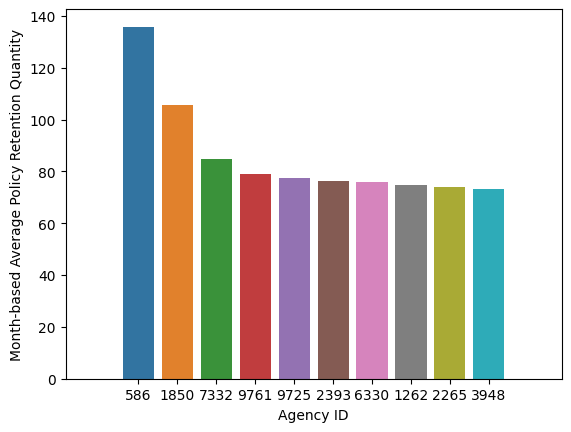

In [41]:
az_1 = sns.barplot(
    data = sorted_grouped_wrt_df.head(10), x = 'AGENCY_ID',
    y = 'MONTH_RETENTION_POLY_QTY', fill = "True"
)
az_1.margins(x=0.15)
az_1.set(xlabel='Agency ID', ylabel='Month-based Average Policy Retention Quantity')

[Text(0.5, 0, 'Agency ID'),
 Text(0, 0.5, 'Month-based Average Policies inforced Quantity')]

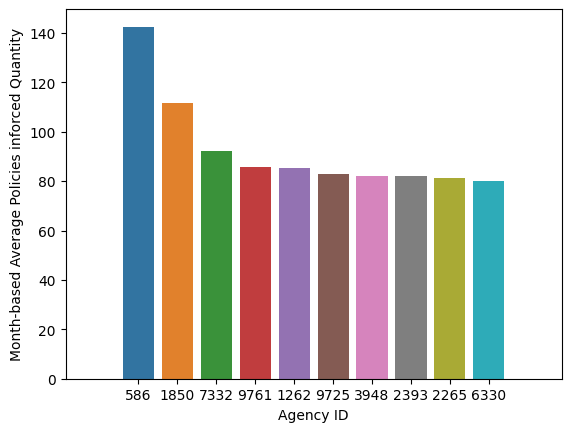

In [42]:
sorted_grouped_wrt_df = grouped_wrt_df.sort_values(by = "MONTH_POLY_INFORCE_QTY", ascending = False).reset_index()
sorted_grouped_wrt_df = sorted_grouped_wrt_df.drop("index",axis = 1)
az_2 = sns.barplot(
    data = sorted_grouped_wrt_df.head(10), x = 'AGENCY_ID',
    y = 'MONTH_POLY_INFORCE_QTY', fill = "True"
)
az_2.margins(x=0.15)
az_2.set(xlabel='Agency ID', ylabel='Month-based Average Policies inforced Quantity')